# Projeto Final

1. Subir no GITHUB todos os jupyter notebooks/códigos que você desenvolveu nesse ultimo módulo
1. Gerar um arquivo python (.py) com todas as funções necessárias para rodar no streamlit a escoragem do arquivo de treino
    - Criar um .py
    - Criar um carregador de csv no streamlit 
    - Subir um csv no streamlit 
    - Criar um pipeline de pré processamento dos dados
    - Utilizar o modelo treinado para escorar a base 
        - nome_arquivo = 'model_final.pkl'
1. Gravar um vídeo da tela do streamlit em funcionamento (usando o próprio streamlit (temos aula disso) ou qlqr outra forma de gravação).
1. Subir no Github o vídeo de funcionamento da ferramenta como README.md.
1. Subir no Github os códigos desenvolvidos. 
1. Enviar links do github para o tutor corrigir.

## **Carregando os dados**


In [ ]:
!pip install pycaret

In [4]:
import pandas as pd
df = pd.read_feather('credit_scoring.ftr')

In [5]:
df.shape

(750000, 15)

In [6]:
df.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'mau'],
      dtype='object')

In [7]:
dataset = df.sample(40000)

In [8]:
dataset.drop(['data_ref','index'], axis=1, inplace=True)

In [9]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Conjunto de dados para modelagem (treino e teste): ' + str(data.shape))
print('Conjunto de dados não usados no treino/teste, apenas como validação: ' + str(data_unseen.shape))

Conjunto de dados para modelagem (treino e teste): (38000, 13)
Conjunto de dados não usados no treino/teste, apenas como validação: (2000, 13)


In [1]:
from pycaret.classification import *

## **Modificando dado de treino**


In [10]:
data.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
mau                         bool
dtype: object

In [11]:
data.qtd_filhos = data.qtd_filhos.astype(float)

In [12]:
data.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
qtd_filhos,1.000000,-0.374077,-0.080879,0.890157,-0.043399,0.003880
idade,-0.374077,1.000000,0.329872,-0.344437,0.097064,-0.020162
tempo_emprego,-0.080879,0.329872,1.000000,-0.067714,0.492322,-0.131175
qt_pessoas_residencia,0.890157,-0.344437,-0.067714,1.000000,-0.051048,0.000330
renda,-0.043399,0.097064,0.492322,-0.051048,1.000000,-0.068229
mau,0.003880,-0.020162,-0.131175,0.000330,-0.068229,1.000000


In [13]:
data.mau.value_counts(normalize=True)

False    0.921474
True     0.078526
Name: mau, dtype: float64

In [14]:
exp_aula4 = setup(data = data, target = 'mau', experiment_name='credit_1',
                  normalize=True, normalize_method='zscore', 
                  transformation=True, transformation_method = 'quantile',
                  fix_imbalance=True)

,Description,Value
0,session_id,2934
1,Target,mau
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(38000, 13)"
5,Missing Values,True
6,Numeric Features,5
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='mau',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                                                  random_state_quantile=2934,
                                                  target='mau')),
                ('binn', 'pass

In [15]:
best_model = compare_models(fold=4, sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7107,0.7793,0.6995,0.1714,0.2754,0.1707,0.2371,2.8125
lda,Linear Discriminant Analysis,0.7063,0.7793,0.7091,0.1707,0.2751,0.1700,0.2383,0.3225
ada,Ada Boost Classifier,0.7368,0.7646,0.6407,0.1766,0.2768,0.1753,0.2300,1.6575
gbc,Gradient Boosting Classifier,0.7879,0.7631,0.5483,0.1962,0.2889,0.1958,0.2318,5.8500
lightgbm,Light Gradient Boosting Machine,0.8717,0.7522,0.3158,0.2502,0.2791,0.2097,0.2115,1.0200
rf,Random Forest Classifier,0.8557,0.7021,0.2077,0.1660,0.1844,0.1064,0.1072,5.2100
nb,Naive Bayes,0.3910,0.6755,0.7890,0.0948,0.1692,0.0336,0.0826,0.1750
et,Extra Trees Classifier,0.8552,0.6525,0.1938,0.1577,0.1737,0.0954,0.0960,5.2075
knn,K Neighbors Classifier,0.7651,0.6419,0.4014,0.1440,0.2119,0.1088,0.1286,4.9750
dt,Decision Tree Classifier,0.8095,0.5723,0.2833,0.1425,0.1896,0.0949,0.1021,0.4175


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2934, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


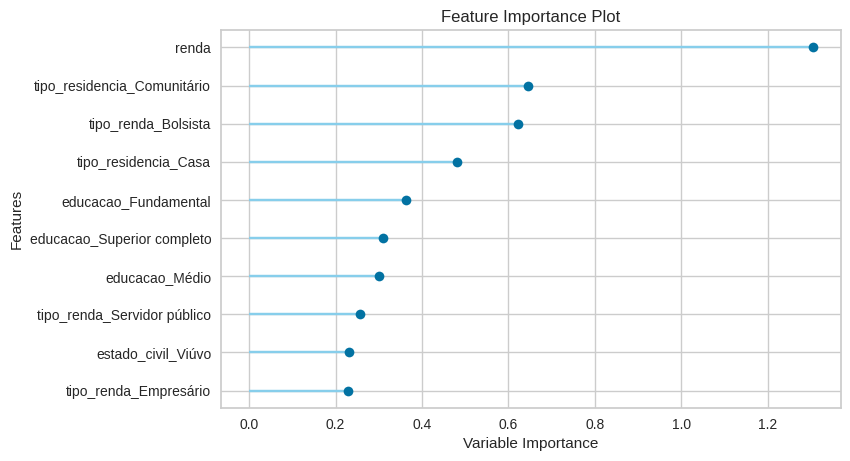

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [16]:
plot_model(best_model, plot='feature')

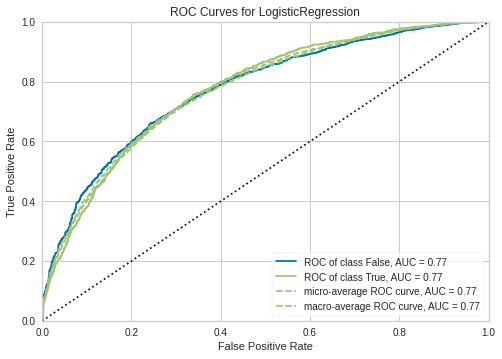

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [17]:
plot_model(best_model, plot='auc')

In [18]:
save_model(best_model,'model_final')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2934, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model_name=model_final, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='mau',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                f

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='mau',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                 

In [19]:
model_saved = load_model('model_final')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=model_final, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [20]:
model_saved.named_steps

{'dtypes': DataTypes_Auto_infer(categorical_features=[], display_types=True,
                      features_todrop=[], id_columns=[],
                      ml_usecase='classification', numerical_features=[],
                      target='mau', time_features=[]),
 'imputer': Simple_Imputer(categorical_strategy='not_available',
                fill_value_categorical=None, fill_value_numerical=None,
                numeric_strategy='mean', target_variable=None),
 'new_levels1': New_Catagorical_Levels_in_TestData(replacement_strategy='least frequent',
                                    target='mau'),
 'ordinal': 'passthrough',
 'cardinality': 'passthrough',
 'znz': 'passthrough',
 'club_R_L': 'passthrough',
 'new_levels': New_Catagorical_Levels_in_TestData(replacement_strategy='least frequent',
                                    target='mau'),
 'feature_time': Make_Time_Features(list_of_features=None,
                    time_feature=Index([], dtype='object')),
 'group': 'passthrough',
 

In [21]:
exp_aula4 = setup(data = data, target = 'mau',
                  normalize = True, 
                  transformation = True, 
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  bin_numeric_features = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia'])

,Description,Value
0,session_id,7127
1,Target,mau
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(38000, 13)"
5,Missing Values,True
6,Numeric Features,5
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='mau',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('dummy', Dummify(target='mau')),
                ('fix_perfect', Remove_100(target='mau')),
                ('clean_names', Clean_Colum_Names()),
           